In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
query_count=1000
item_count=10**6


In [9]:

def calc_rank_to_dist(dataset, sample_count=100):
    scores_path = "{}/data/model_scores/scores_train.bin".format(dataset)
    scores = np.fromfile(scores_path, dtype="float32").reshape((item_count, query_count))
    items = np.random.choice(item_count, sample_count, replace=False)
    result = np.zeros(item_count, dtype="float32")
    for i in items:
        distances = ((scores - scores[i]) ** 2).sum(axis=1)
        distances.sort()
        result += distances
    result /= sample_count
    plt.plot(result)
    
    result_path = "{}/data/rankToDist.bin".format(dataset)
    result.tofile(result_path)


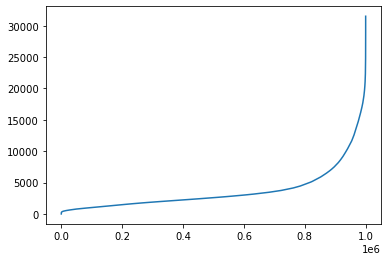

In [10]:
calc_rank_to_dist("collections")

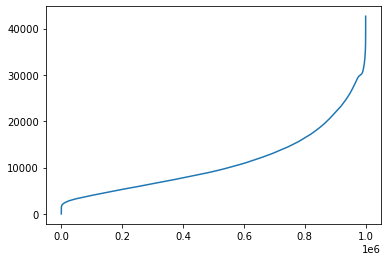

In [11]:
calc_rank_to_dist("video")